In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import h5py as h5
from pathlib import Path
import tables
import os
import sys

from tqdm import tqdm
from importlib import reload

sys.path.append('../')

In [2]:
plt.style.use('dark_background')
#matplotlib.rcParams.keys()
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('font', size=12)
length = 8
width = 1.5
plt.rcParams['xtick.major.size'] = length 
plt.rcParams['ytick.major.size'] = length
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.major.width'] = width

# Correct JF images

In [3]:
from custom_analysis.correct_jf_img import Correct_JF_img

In [4]:
run = 72 #209 #72
exp = 'xpplv7918'

p = Path('/reg/data/drpsrcf/xpp/xpplv7918/scratch/hdf5/speed_tests')
fname = p / '{}_Run{:04d}.h5'.format(exp, run)

rr = tables.open_file(fname).root

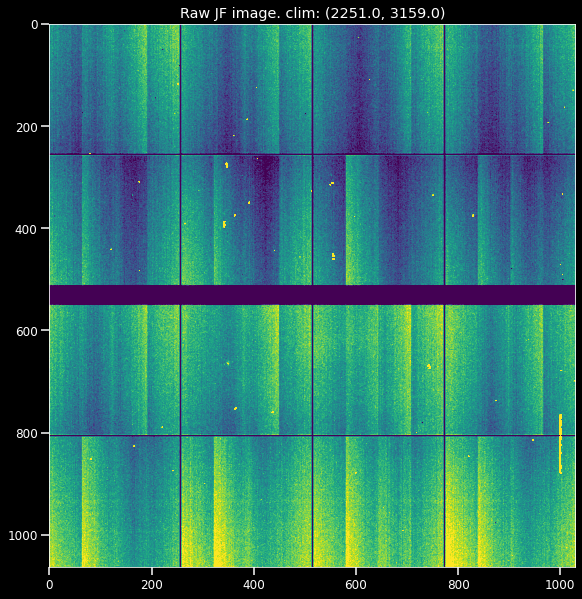

In [5]:
im = rr.jungfrau1M.image_from_dat_image[2000]
_, ax = plt.subplots(figsize=(10,10))
ax.imshow(im, clim=(np.percentile(im, 5), np.percentile(im, 99)))
ax.set_title('Raw JF image. clim: {}'.format((np.percentile(im, 5), np.percentile(im, 99))))
plt.show()

In [6]:
jfconfig = rr.UserDataCfg.jungfrau1M # contains pedestals, gains map, etc

In [7]:
cor = Correct_JF_img(ped=jfconfig.ped[()], 
                    gain=jfconfig.gain[()], 
                    offset=jfconfig.offset[()], 
                    ix=jfconfig.ix[()], 
                    iy=jfconfig.iy[()], 
                    mask=jfconfig.cmask[()])

../custom_analysis/correct_jf_img.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return pro_num / pro_den


In [8]:
cims = []
for ii in tqdm(range(100)):
    im = rr.jungfrau1M.image_from_dat_image[ii]
    cim = cor.correct_img(im)
    cims.append(cim)

100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


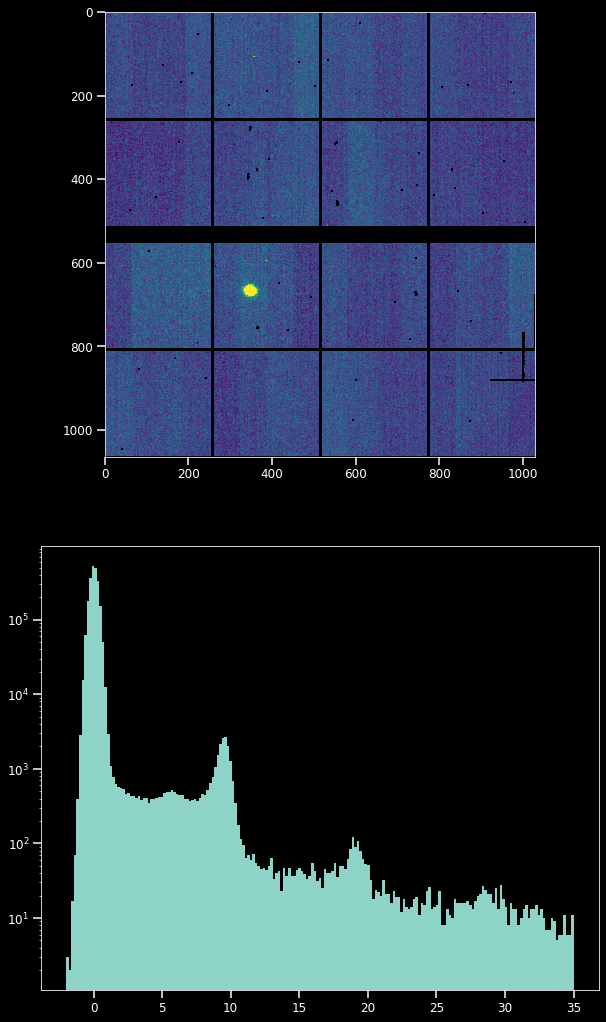

In [13]:
cims = np.ma.asarray(cims)
# cims = np.asarray(cims)
summed = cims.sum(axis=0)

_, ax = plt.subplots(figsize=(10,18), nrows=2)
ax[0].imshow(summed, clim=(np.percentile(summed, 5), np.percentile(summed, 99.9)))
# ax[0].imshow(summed, clim=(0,1e2))
ax[1].hist(cims[:,600:750,250:400].ravel(), bins=np.linspace(-2,35,200))
ax[1].set_yscale('log')
plt.show()